In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2022-09-26 00:10:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: 'housing.csv.1'

     0K .......... .......... .......... .......... ..........  3%  857K 2s
    50K .......... .......... .......... .......... ..........  7% 13.3M 1s
   100K .......... .......... .......... .......... .......... 10% 1.29M 1s
   150K .......... .......... .......... .......... .......... 14% 5.22M 1s
   200K .......... .......... .......... .......... .......... 17% 4.32M 1s
   250K .......... .......... .......... .......... .......... 21% 2.19M 1s
   300K .......... .......... .......... .......... .......... 25% 5.97M 0s
   350K .......... .......... 

In [123]:
df = pd.read_csv('housing.csv')

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [124]:
features = [
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity'
]

## Data preparation

- Select only the features from above and fill in the missing values with 0.
- Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
- Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
- Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [125]:
df.isnull().sum(axis = 0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [126]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [127]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [128]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


## Question 1

What is the most frequent observation (mode) for the column ocean_proximity? 

**<1H OCEAN**


In [131]:
df['ocean_proximity'].mode()

0    <1H OCEAN
Name: ocean_proximity, dtype: object

In [132]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Question 2

- Create the correlation matrix for the numerical features of your train dataset.
    - In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
- What are the two features that have the biggest correlation in this dataset?

**total_bedrooms & households**


In [133]:
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
ocean_proximity              object
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
dtype: object

In [134]:
numeric = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 
    'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

In [135]:
df[numeric].corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
housing_median_age,1.000000,-0.361262,-0.317063,-0.296244,-0.302916,-0.119034,-0.153277,0.125396,0.013191
total_rooms,-0.361262,1.000000,0.920196,0.857126,0.918484,0.198050,0.133798,-0.174583,-0.024581
total_bedrooms,-0.317063,0.920196,1.000000,0.866266,0.966507,-0.007295,0.002717,0.122205,-0.028019
population,-0.296244,0.857126,0.866266,1.000000,0.907222,0.004834,-0.072213,0.031397,0.069863
households,-0.302916,0.918484,0.966507,0.907222,1.000000,0.013033,-0.080598,0.059818,-0.027309
median_income,-0.119034,0.198050,-0.007295,0.004834,0.013033,1.000000,0.326895,-0.573836,0.018766
rooms_per_household,-0.153277,0.133798,0.002717,-0.072213,-0.080598,0.326895,1.000000,-0.387465,-0.004852
bedrooms_per_room,0.125396,-0.174583,0.122205,0.031397,0.059818,-0.573836,-0.387465,1.000000,0.003047
population_per_household,0.013191,-0.024581,-0.028019,0.069863,-0.027309,0.018766,-0.004852,0.003047,1.000000


In [136]:
import seaborn as sn
import matplotlib.pyplot as plt

In [137]:
plt.rcParams['figure.figsize'] = (6, 6)

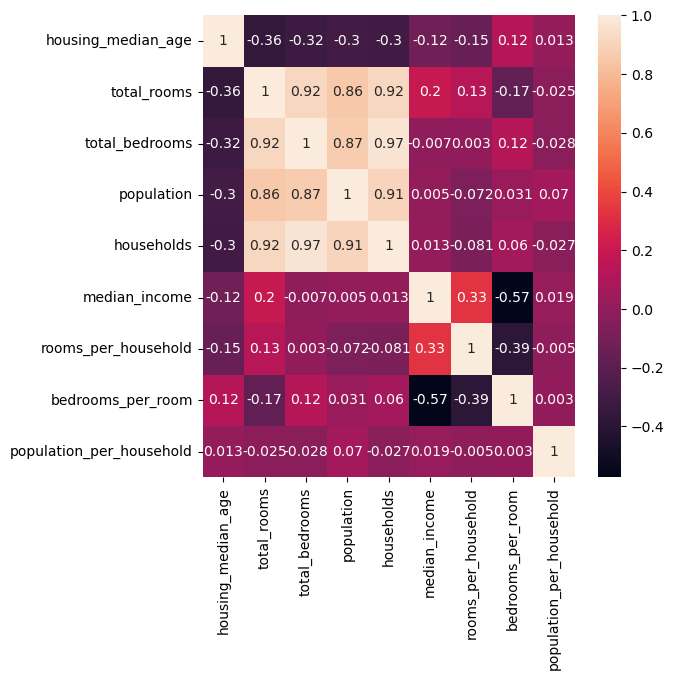

In [138]:
corrMatrix = df[numeric].corr().round(3)
sn.heatmap(corrMatrix, annot=True)

plt.show()

In [139]:
corr_list = corrMatrix.unstack()
corr_sort = corr_list.sort_values()

print(corr_sort.iloc[-15:])

total_rooms               households                  0.918
households                total_rooms                 0.918
total_bedrooms            total_rooms                 0.920
total_rooms               total_bedrooms              0.920
households                total_bedrooms              0.967
total_bedrooms            households                  0.967
housing_median_age        housing_median_age          1.000
households                households                  1.000
rooms_per_household       rooms_per_household         1.000
median_income             median_income               1.000
population                population                  1.000
total_bedrooms            total_bedrooms              1.000
total_rooms               total_rooms                 1.000
bedrooms_per_room         bedrooms_per_room           1.000
population_per_household  population_per_household    1.000
dtype: float64


## Make median_house_value binary

- We need to turn the median_house_value variable from numeric into binary.
- Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.


In [140]:
df['above_average'] = (df['median_house_value'] > df['median_house_value'].mean()).astype(int)

df['median_house_value'].mean()

206855.81690891474

In [141]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,1


## Split the data

- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
- Make sure that the target value (median_house_value) is not in your dataframe.


In [142]:
from sklearn.model_selection import train_test_split

In [143]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [144]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [145]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [146]:
#y_train = df_train['median_house_value'].values
#y_val = df_val['median_house_value'].values
#y_test = df_test['median_house_value'].values

y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [147]:
y_train

array([1, 1, 0, ..., 1, 0, 0])

In [148]:
df_train.head(2)
df_train.shape

(12384, 12)

In [149]:
df_val.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
1,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949


In [150]:
df_test.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,INLAND,4.192201,0.0,3.877437
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,INLAND,5.039384,0.0,2.679795


## Question 3

- Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.
- What is the value of mutual information?
- Round it to 2 decimal digits using round(score, 2)

**0.1**


In [151]:
from sklearn.metrics import mutual_info_score

In [152]:
round(mutual_info_score(df_train['ocean_proximity'], y_train), 2)

0.1

## Question 4

- Now let's train a logistic regression
- Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
- Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

**0.84**


In [153]:
from sklearn.feature_extraction import DictVectorizer

In [154]:
dv = DictVectorizer(sparse = False)

train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [155]:
X_train.shape

(12384, 16)

In [156]:
dv.get_feature_names_out()

array(['bedrooms_per_room', 'households', 'housing_median_age',
       'latitude', 'longitude', 'median_income',
       'ocean_proximity=<1H OCEAN', 'ocean_proximity=INLAND',
       'ocean_proximity=ISLAND', 'ocean_proximity=NEAR BAY',
       'ocean_proximity=NEAR OCEAN', 'population',
       'population_per_household', 'rooms_per_household',
       'total_bedrooms', 'total_rooms'], dtype=object)

In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
model = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000, random_state = 42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [159]:
print(model.intercept_[0].round(3))
print(model.coef_[0].round(3))

-0.062
[ 0.113  0.004  0.036  0.103  0.083  1.196  0.452 -1.599  0.012  0.309
  0.763 -0.002  0.01  -0.014  0.002 -0.   ]


In [160]:
y_pred = model.predict(X_val)

#Another way, manually specifying the threshold
#y_pred = model.predict_proba(X_val)[:, 1]
#decision = (y_pred >= 0.5)
#(y_val == decision).mean()

In [161]:
acc = (y_val == y_pred).mean()
acc

0.8359980620155039

## Question 5

- Let's find the least useful feature using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
    - total_rooms
    - total_bedrooms
    - population
    - households

*note: the difference doesn't have to be positive*

**total_rooms**


In [162]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'bedrooms_per_room': 0.113,
 'households': 0.004,
 'housing_median_age': 0.036,
 'latitude': 0.103,
 'longitude': 0.083,
 'median_income': 1.196,
 'ocean_proximity=<1H OCEAN': 0.452,
 'ocean_proximity=INLAND': -1.599,
 'ocean_proximity=ISLAND': 0.012,
 'ocean_proximity=NEAR BAY': 0.309,
 'ocean_proximity=NEAR OCEAN': 0.763,
 'population': -0.002,
 'population_per_household': 0.01,
 'rooms_per_household': -0.014,
 'total_bedrooms': 0.002,
 'total_rooms': -0.0}

In [163]:
def train_log_regression(df_train, y_train, df_val, y_val, features):
    
    dvc = DictVectorizer(sparse = False)

    tr_dict = df_train[features].to_dict(orient = 'records')
    vl_dict = df_val[features].to_dict(orient = 'records')
    
    X_tr = dvc.fit_transform(tr_dict)
    X_vl = dvc.transform(vl_dict)
    
    mdl = LogisticRegression(solver = "liblinear", C = 1.0, max_iter = 1000, random_state = 42)
    mdl.fit(X_tr, y_train)
    
    y_pr = mdl.predict(X_vl)    
    result = (y_val == y_pr).mean()
    
    return result

In [164]:
scores_dict = {}

features = list(df_train.columns)
test = list(df_train.columns)

for f in features:
    test.remove(f)

    score = train_log_regression(df_train, y_train, df_val, y_val, test)
    diff = abs(acc - score)
    
    scores_dict[f] = [score, diff]
    
    test = list(df_train.columns)

In [165]:
dict(sorted(scores_dict.items(), key=lambda item: item[1][1]))

{'population_per_household': [0.8357558139534884, 0.0002422480620154488],
 'total_rooms': [0.8362403100775194, 0.00024224806201555982],
 'bedrooms_per_room': [0.8362403100775194, 0.00024224806201555982],
 'rooms_per_household': [0.8352713178294574, 0.0007267441860464574],
 'total_bedrooms': [0.8372093023255814, 0.001211240310077577],
 'households': [0.8340600775193798, 0.0019379844961240345],
 'latitude': [0.8323643410852714, 0.003633720930232509],
 'longitude': [0.8318798449612403, 0.004118217054263518],
 'housing_median_age': [0.8316375968992248, 0.0043604651162790775],
 'population': [0.8263081395348837, 0.009689922480620172],
 'ocean_proximity': [0.8202519379844961, 0.015746124031007724],
 'median_income': [0.7853682170542635, 0.050629844961240345]}

## Question 6

- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha. 

**0**


In [166]:
from sklearn.linear_model import Ridge

In [167]:
df_full_train_6, df_test_6 = train_test_split(df, test_size = 0.2, random_state = 42)
df_train_6, df_val_6 = train_test_split(df_full_train_6, test_size = 0.25, random_state = 42)

In [168]:
y_train_6 = np.log1p(df_train_6['median_house_value'].values)
y_val_6 = np.log1p(df_val_6['median_house_value'].values)
y_test_6 = np.log1p(df_test_6['median_house_value'].values)

del df_train_6['median_house_value']
del df_val_6['median_house_value']
del df_test_6['median_house_value']

del df_train_6['above_average']
del df_val_6['above_average']
del df_test_6['above_average']

In [169]:
df_train_6.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
17244,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1H OCEAN,3.922460,0.259714,3.754011
8817,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,NEAR OCEAN,7.564516,0.130228,2.789082


In [170]:
df_val_6.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
2071,-119.85,36.74,35.0,1191.0,190.0,537.0,182.0,3.5375,INLAND,6.543956,0.159530,2.950549
2612,-124.16,41.02,23.0,1672.0,385.0,1060.0,390.0,2.1726,NEAR OCEAN,4.287179,0.230263,2.717949


In [171]:
df_test_6.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812,INLAND,4.192201,0.0,3.877437
3024,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313,INLAND,5.039384,0.0,2.679795


In [172]:
y_train_6

array([12.39421473, 13.12236738, 11.06821524, ..., 12.27979233,
       11.84223641, 12.10791391])

In [173]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [174]:
scores_6 = {}

dv_6 = DictVectorizer(sparse = False)

train_dict_6 = df_train_6.to_dict(orient = 'records')
val_dict_6 = df_val_6.to_dict(orient = 'records')

X_train_6 = dv_6.fit_transform(train_dict_6)
X_val_6 = dv_6.transform(val_dict_6)

for a in [0, 0.01, 0.1, 1, 10]:
    
    model_6 = Ridge(alpha = a, solver = "sag", random_state = 42)
    model_6.fit(X_train_6, y_train_6)
    
    y_pred_6 = model_6.predict(X_val_6)  
    
    scores_6[a] = rmse(y_val_6, y_pred_6)
    

In [175]:
dict(sorted(scores_6.items(), key=lambda item: item[1])) 

{0: 0.524063570701514,
 0.01: 0.524063570718629,
 0.1: 0.5240635708812071,
 1: 0.5240635725155536,
 10: 0.5240635888333284}